In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df=sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
q1=df.price.quantile(0.25)
q3=df.price.quantile(0.75)
iqr=q3-q1
down_limit=(q1-iqr*1.5)
up_limit=(q3+iqr*1.5)
down_limit,up_limit

df=df[df.price < 11886]

df_one_hot=pd.get_dummies(df,columns=["cut","color","clarity"])

df=df_one_hot

from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor()
lof.fit_predict(df)
scores=lof.negative_outlier_factor_

vector= scores >= -2

df=df[vector]

x=df.drop(["price"],axis=1)
y=df.price
from sklearn.model_selection import train_test_split,GridSearchCV

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
y_test

47175    1836
45903    1720
15034     605
43588    1432
45803    1710
         ... 
53204    2633
14939    6018
24030     633
15490    6206
29007     686
Name: price, Length: 10060, dtype: int64

In [7]:
eval_set=[(x_test,y_test)]
xgb_model=XGBRegressor(n_estimators=500,max_depth=8).fit(x_train,y_train,eval_metric="rmse",eval_set=eval_set,verbose=True)

[0]	validation_0-rmse:2950.18970
[1]	validation_0-rmse:2110.31104
[2]	validation_0-rmse:1526.69617
[3]	validation_0-rmse:1126.76050
[4]	validation_0-rmse:856.14081
[5]	validation_0-rmse:679.57025
[6]	validation_0-rmse:564.88983
[7]	validation_0-rmse:494.56354
[8]	validation_0-rmse:448.83697
[9]	validation_0-rmse:422.39383
[10]	validation_0-rmse:407.22406
[11]	validation_0-rmse:398.39642
[12]	validation_0-rmse:391.93228
[13]	validation_0-rmse:387.45844
[14]	validation_0-rmse:384.66684
[15]	validation_0-rmse:382.22806
[16]	validation_0-rmse:380.83994
[17]	validation_0-rmse:380.02750
[18]	validation_0-rmse:378.85321
[19]	validation_0-rmse:376.93723
[20]	validation_0-rmse:376.16913
[21]	validation_0-rmse:375.31586
[22]	validation_0-rmse:375.77713
[23]	validation_0-rmse:375.39288
[24]	validation_0-rmse:374.69830
[25]	validation_0-rmse:373.97998
[26]	validation_0-rmse:373.63663
[27]	validation_0-rmse:374.18155
[28]	validation_0-rmse:373.97601
[29]	validation_0-rmse:373.12454
[30]	validation_

[245]	validation_0-rmse:376.42957
[246]	validation_0-rmse:376.44308
[247]	validation_0-rmse:376.37982
[248]	validation_0-rmse:376.39932
[249]	validation_0-rmse:376.49637
[250]	validation_0-rmse:376.52982
[251]	validation_0-rmse:376.54715
[252]	validation_0-rmse:376.55450
[253]	validation_0-rmse:376.52457
[254]	validation_0-rmse:376.53714
[255]	validation_0-rmse:376.61762
[256]	validation_0-rmse:376.63229
[257]	validation_0-rmse:376.63156
[258]	validation_0-rmse:376.67618
[259]	validation_0-rmse:376.78165
[260]	validation_0-rmse:376.77747
[261]	validation_0-rmse:376.85449
[262]	validation_0-rmse:376.93973
[263]	validation_0-rmse:376.97263
[264]	validation_0-rmse:377.01572
[265]	validation_0-rmse:377.03033
[266]	validation_0-rmse:376.99350
[267]	validation_0-rmse:376.93472
[268]	validation_0-rmse:377.02786
[269]	validation_0-rmse:377.02771
[270]	validation_0-rmse:376.92068
[271]	validation_0-rmse:376.92551
[272]	validation_0-rmse:376.92285
[273]	validation_0-rmse:376.92685
[274]	validati

[486]	validation_0-rmse:380.27902
[487]	validation_0-rmse:380.30102
[488]	validation_0-rmse:380.31546
[489]	validation_0-rmse:380.29623
[490]	validation_0-rmse:380.29273
[491]	validation_0-rmse:380.31067
[492]	validation_0-rmse:380.30844
[493]	validation_0-rmse:380.29159
[494]	validation_0-rmse:380.28436
[495]	validation_0-rmse:380.30209
[496]	validation_0-rmse:380.29932
[497]	validation_0-rmse:380.30890
[498]	validation_0-rmse:380.31912
[499]	validation_0-rmse:380.36359


In [10]:
y_pred=xgb_model.predict(x_test)
preds=[round(i) for i in y_pred]
accuracy = accuracy_score(y_test, preds)
print("Accuracy:",  "%", (accuracy * 100.0))

Accuracy: % 0.5268389662027833


In [29]:
eval_set=[(x_train,y_train),(x_test,y_test)]
model=XGBRegressor(n_estimators=5000,max_depth=8)
model.fit(x_train,y_train,eval_set=eval_set,eval_metric=["rmse","mae"],verbose=True)

[0]	validation_0-rmse:2985.48144	validation_0-mae:2220.84668	validation_1-rmse:2950.18970	validation_1-mae:2194.29761
[1]	validation_0-rmse:2135.24072	validation_0-mae:1557.49182	validation_1-rmse:2110.31104	validation_1-mae:1538.72620
[2]	validation_0-rmse:1545.70166	validation_0-mae:1093.75171	validation_1-rmse:1526.69617	validation_1-mae:1079.62537
[3]	validation_0-rmse:1137.46375	validation_0-mae:774.17285	validation_1-rmse:1126.76050	validation_1-mae:765.57257
[4]	validation_0-rmse:858.91699	validation_0-mae:559.69495	validation_1-rmse:856.14081	validation_1-mae:557.38049
[5]	validation_0-rmse:673.53241	validation_0-mae:422.65067	validation_1-rmse:679.57025	validation_1-mae:425.06918
[6]	validation_0-rmse:553.98846	validation_0-mae:338.91107	validation_1-rmse:564.88983	validation_1-mae:344.21765
[7]	validation_0-rmse:479.81424	validation_0-mae:287.75052	validation_1-rmse:494.56354	validation_1-mae:295.79242
[8]	validation_0-rmse:429.36874	validation_0-mae:256.11383	validation_1-rm

[72]	validation_0-rmse:232.66968	validation_0-mae:143.96233	validation_1-rmse:371.56473	validation_1-mae:210.02930
[73]	validation_0-rmse:231.16682	validation_0-mae:143.29764	validation_1-rmse:372.02200	validation_1-mae:210.33380
[74]	validation_0-rmse:229.69206	validation_0-mae:142.61542	validation_1-rmse:372.16330	validation_1-mae:210.41525
[75]	validation_0-rmse:228.22176	validation_0-mae:141.84421	validation_1-rmse:372.24493	validation_1-mae:210.47214
[76]	validation_0-rmse:227.36990	validation_0-mae:141.23524	validation_1-rmse:372.30997	validation_1-mae:210.38556
[77]	validation_0-rmse:226.36267	validation_0-mae:140.75549	validation_1-rmse:372.45462	validation_1-mae:210.33456
[78]	validation_0-rmse:225.63695	validation_0-mae:140.14847	validation_1-rmse:372.47784	validation_1-mae:210.25084
[79]	validation_0-rmse:224.13745	validation_0-mae:139.47963	validation_1-rmse:372.88602	validation_1-mae:210.40770
[80]	validation_0-rmse:222.76900	validation_0-mae:138.83302	validation_1-rmse:37

[143]	validation_0-rmse:178.80121	validation_0-mae:111.10128	validation_1-rmse:373.13107	validation_1-mae:208.50404
[144]	validation_0-rmse:177.13348	validation_0-mae:110.20522	validation_1-rmse:373.13892	validation_1-mae:208.52589
[145]	validation_0-rmse:175.63887	validation_0-mae:109.58706	validation_1-rmse:373.00864	validation_1-mae:208.56305
[146]	validation_0-rmse:174.72546	validation_0-mae:109.03467	validation_1-rmse:372.94080	validation_1-mae:208.53084
[147]	validation_0-rmse:174.48612	validation_0-mae:108.82330	validation_1-rmse:372.87082	validation_1-mae:208.49890
[148]	validation_0-rmse:173.57613	validation_0-mae:108.35373	validation_1-rmse:373.06406	validation_1-mae:208.58775
[149]	validation_0-rmse:172.90767	validation_0-mae:107.93482	validation_1-rmse:373.31555	validation_1-mae:208.64610
[150]	validation_0-rmse:172.82248	validation_0-mae:107.85220	validation_1-rmse:373.29779	validation_1-mae:208.64523
[151]	validation_0-rmse:172.13628	validation_0-mae:107.51961	validation_

[214]	validation_0-rmse:137.12158	validation_0-mae:87.45028	validation_1-rmse:374.92709	validation_1-mae:209.46570
[215]	validation_0-rmse:136.87680	validation_0-mae:87.29480	validation_1-rmse:374.87997	validation_1-mae:209.45961
[216]	validation_0-rmse:136.49187	validation_0-mae:87.04977	validation_1-rmse:374.83920	validation_1-mae:209.48465
[217]	validation_0-rmse:136.08110	validation_0-mae:86.84181	validation_1-rmse:374.87705	validation_1-mae:209.50249
[218]	validation_0-rmse:136.05371	validation_0-mae:86.78520	validation_1-rmse:374.88666	validation_1-mae:209.51060
[219]	validation_0-rmse:135.50696	validation_0-mae:86.53629	validation_1-rmse:374.95645	validation_1-mae:209.57503
[220]	validation_0-rmse:135.24107	validation_0-mae:86.34438	validation_1-rmse:374.99170	validation_1-mae:209.60500
[221]	validation_0-rmse:134.61124	validation_0-mae:86.02891	validation_1-rmse:375.11142	validation_1-mae:209.63480
[222]	validation_0-rmse:134.11554	validation_0-mae:85.81733	validation_1-rmse:37

[286]	validation_0-rmse:112.84737	validation_0-mae:72.58508	validation_1-rmse:377.34610	validation_1-mae:210.28178
[287]	validation_0-rmse:112.69654	validation_0-mae:72.47036	validation_1-rmse:377.27078	validation_1-mae:210.25008
[288]	validation_0-rmse:112.45732	validation_0-mae:72.31471	validation_1-rmse:377.33148	validation_1-mae:210.27269
[289]	validation_0-rmse:112.41738	validation_0-mae:72.27338	validation_1-rmse:377.30383	validation_1-mae:210.26210
[290]	validation_0-rmse:112.39492	validation_0-mae:72.23799	validation_1-rmse:377.31146	validation_1-mae:210.26340
[291]	validation_0-rmse:112.17168	validation_0-mae:72.09575	validation_1-rmse:377.38931	validation_1-mae:210.31990
[292]	validation_0-rmse:111.80260	validation_0-mae:71.87000	validation_1-rmse:377.41205	validation_1-mae:210.38541
[293]	validation_0-rmse:111.61392	validation_0-mae:71.73641	validation_1-rmse:377.48438	validation_1-mae:210.41995
[294]	validation_0-rmse:111.24286	validation_0-mae:71.55051	validation_1-rmse:37

[358]	validation_0-rmse:94.87273	validation_0-mae:61.08462	validation_1-rmse:378.71561	validation_1-mae:211.21481
[359]	validation_0-rmse:94.44714	validation_0-mae:60.82612	validation_1-rmse:378.69510	validation_1-mae:211.18680
[360]	validation_0-rmse:94.40488	validation_0-mae:60.76946	validation_1-rmse:378.68719	validation_1-mae:211.18976
[361]	validation_0-rmse:94.32983	validation_0-mae:60.64426	validation_1-rmse:378.68662	validation_1-mae:211.15749
[362]	validation_0-rmse:94.16812	validation_0-mae:60.51088	validation_1-rmse:378.69885	validation_1-mae:211.16759
[363]	validation_0-rmse:93.63333	validation_0-mae:60.25651	validation_1-rmse:378.82544	validation_1-mae:211.19560
[364]	validation_0-rmse:93.27152	validation_0-mae:60.03445	validation_1-rmse:378.81110	validation_1-mae:211.23885
[365]	validation_0-rmse:93.19863	validation_0-mae:59.96873	validation_1-rmse:378.79153	validation_1-mae:211.23969
[366]	validation_0-rmse:93.18243	validation_0-mae:59.92007	validation_1-rmse:378.78876	v

[430]	validation_0-rmse:79.97483	validation_0-mae:51.35490	validation_1-rmse:379.53461	validation_1-mae:211.29741
[431]	validation_0-rmse:79.91552	validation_0-mae:51.28017	validation_1-rmse:379.53980	validation_1-mae:211.28819
[432]	validation_0-rmse:79.75725	validation_0-mae:51.16951	validation_1-rmse:379.51724	validation_1-mae:211.30196
[433]	validation_0-rmse:79.38886	validation_0-mae:50.98119	validation_1-rmse:379.55570	validation_1-mae:211.29004
[434]	validation_0-rmse:79.27979	validation_0-mae:50.91035	validation_1-rmse:379.55453	validation_1-mae:211.30907
[435]	validation_0-rmse:79.22257	validation_0-mae:50.86766	validation_1-rmse:379.55322	validation_1-mae:211.31969
[436]	validation_0-rmse:79.06256	validation_0-mae:50.76018	validation_1-rmse:379.55872	validation_1-mae:211.31587
[437]	validation_0-rmse:78.99398	validation_0-mae:50.70890	validation_1-rmse:379.56229	validation_1-mae:211.30721
[438]	validation_0-rmse:78.89425	validation_0-mae:50.63195	validation_1-rmse:379.60449	v

[502]	validation_0-rmse:67.87011	validation_0-mae:43.77103	validation_1-rmse:380.49100	validation_1-mae:211.78143
[503]	validation_0-rmse:67.67768	validation_0-mae:43.64098	validation_1-rmse:380.47171	validation_1-mae:211.74150
[504]	validation_0-rmse:67.66470	validation_0-mae:43.61743	validation_1-rmse:380.47134	validation_1-mae:211.73772
[505]	validation_0-rmse:67.55854	validation_0-mae:43.53291	validation_1-rmse:380.47253	validation_1-mae:211.77739
[506]	validation_0-rmse:67.29506	validation_0-mae:43.38430	validation_1-rmse:380.50305	validation_1-mae:211.78322
[507]	validation_0-rmse:67.23028	validation_0-mae:43.32217	validation_1-rmse:380.50388	validation_1-mae:211.77843
[508]	validation_0-rmse:67.11078	validation_0-mae:43.23990	validation_1-rmse:380.51630	validation_1-mae:211.79170
[509]	validation_0-rmse:67.04713	validation_0-mae:43.17502	validation_1-rmse:380.49786	validation_1-mae:211.77411
[510]	validation_0-rmse:66.93867	validation_0-mae:43.10642	validation_1-rmse:380.51657	v

[574]	validation_0-rmse:57.70329	validation_0-mae:37.34811	validation_1-rmse:381.34879	validation_1-mae:212.20323
[575]	validation_0-rmse:57.61843	validation_0-mae:37.27609	validation_1-rmse:381.36267	validation_1-mae:212.21089
[576]	validation_0-rmse:57.55627	validation_0-mae:37.19129	validation_1-rmse:381.36340	validation_1-mae:212.20743
[577]	validation_0-rmse:57.49855	validation_0-mae:37.12914	validation_1-rmse:381.35745	validation_1-mae:212.21640
[578]	validation_0-rmse:57.25387	validation_0-mae:36.99634	validation_1-rmse:381.39822	validation_1-mae:212.24268
[579]	validation_0-rmse:57.20501	validation_0-mae:36.93985	validation_1-rmse:381.40076	validation_1-mae:212.23173
[580]	validation_0-rmse:57.09794	validation_0-mae:36.87349	validation_1-rmse:381.40289	validation_1-mae:212.22681
[581]	validation_0-rmse:56.87011	validation_0-mae:36.76215	validation_1-rmse:381.42465	validation_1-mae:212.25578
[582]	validation_0-rmse:56.81819	validation_0-mae:36.71428	validation_1-rmse:381.46393	v

[646]	validation_0-rmse:50.37835	validation_0-mae:32.57550	validation_1-rmse:381.90283	validation_1-mae:212.43492
[647]	validation_0-rmse:50.20432	validation_0-mae:32.47696	validation_1-rmse:381.90362	validation_1-mae:212.44461
[648]	validation_0-rmse:50.18280	validation_0-mae:32.45038	validation_1-rmse:381.90008	validation_1-mae:212.44351
[649]	validation_0-rmse:50.16409	validation_0-mae:32.42679	validation_1-rmse:381.90390	validation_1-mae:212.44406
[650]	validation_0-rmse:50.00838	validation_0-mae:32.33579	validation_1-rmse:381.88815	validation_1-mae:212.42813
[651]	validation_0-rmse:49.98284	validation_0-mae:32.29831	validation_1-rmse:381.87955	validation_1-mae:212.41746
[652]	validation_0-rmse:49.77104	validation_0-mae:32.18107	validation_1-rmse:381.90671	validation_1-mae:212.42522
[653]	validation_0-rmse:49.70294	validation_0-mae:32.11827	validation_1-rmse:381.90640	validation_1-mae:212.41769
[654]	validation_0-rmse:49.50977	validation_0-mae:31.99709	validation_1-rmse:381.92246	v

[718]	validation_0-rmse:44.03060	validation_0-mae:28.32322	validation_1-rmse:382.29172	validation_1-mae:212.70660
[719]	validation_0-rmse:43.94871	validation_0-mae:28.26818	validation_1-rmse:382.29596	validation_1-mae:212.71225
[720]	validation_0-rmse:43.86687	validation_0-mae:28.21281	validation_1-rmse:382.31836	validation_1-mae:212.70070
[721]	validation_0-rmse:43.66681	validation_0-mae:28.10261	validation_1-rmse:382.33246	validation_1-mae:212.68311
[722]	validation_0-rmse:43.56045	validation_0-mae:28.03175	validation_1-rmse:382.34015	validation_1-mae:212.69518
[723]	validation_0-rmse:43.50427	validation_0-mae:27.98344	validation_1-rmse:382.34628	validation_1-mae:212.69237
[724]	validation_0-rmse:43.44246	validation_0-mae:27.93107	validation_1-rmse:382.35611	validation_1-mae:212.70908
[725]	validation_0-rmse:43.32392	validation_0-mae:27.86846	validation_1-rmse:382.35483	validation_1-mae:212.71497
[726]	validation_0-rmse:43.29019	validation_0-mae:27.83568	validation_1-rmse:382.36111	v

[790]	validation_0-rmse:38.52104	validation_0-mae:24.65638	validation_1-rmse:382.79736	validation_1-mae:212.96344
[791]	validation_0-rmse:38.48929	validation_0-mae:24.63202	validation_1-rmse:382.79034	validation_1-mae:212.96133
[792]	validation_0-rmse:38.45581	validation_0-mae:24.60043	validation_1-rmse:382.80899	validation_1-mae:212.96794
[793]	validation_0-rmse:38.44666	validation_0-mae:24.59242	validation_1-rmse:382.80566	validation_1-mae:212.96323
[794]	validation_0-rmse:38.34475	validation_0-mae:24.52898	validation_1-rmse:382.79187	validation_1-mae:212.95473
[795]	validation_0-rmse:38.32664	validation_0-mae:24.50403	validation_1-rmse:382.78250	validation_1-mae:212.95244
[796]	validation_0-rmse:38.23186	validation_0-mae:24.44144	validation_1-rmse:382.78891	validation_1-mae:212.96852
[797]	validation_0-rmse:38.08367	validation_0-mae:24.35659	validation_1-rmse:382.78784	validation_1-mae:212.96114
[798]	validation_0-rmse:38.06063	validation_0-mae:24.33184	validation_1-rmse:382.78549	v

[862]	validation_0-rmse:34.33116	validation_0-mae:21.83160	validation_1-rmse:382.94211	validation_1-mae:213.16058
[863]	validation_0-rmse:34.27103	validation_0-mae:21.78611	validation_1-rmse:382.94620	validation_1-mae:213.16354
[864]	validation_0-rmse:34.23885	validation_0-mae:21.75916	validation_1-rmse:382.94980	validation_1-mae:213.17276
[865]	validation_0-rmse:34.23193	validation_0-mae:21.74617	validation_1-rmse:382.94498	validation_1-mae:213.17055
[866]	validation_0-rmse:34.17967	validation_0-mae:21.71050	validation_1-rmse:382.95212	validation_1-mae:213.17857
[867]	validation_0-rmse:34.16604	validation_0-mae:21.69338	validation_1-rmse:382.95017	validation_1-mae:213.17931
[868]	validation_0-rmse:34.12388	validation_0-mae:21.65937	validation_1-rmse:382.95135	validation_1-mae:213.18062
[869]	validation_0-rmse:34.11325	validation_0-mae:21.64913	validation_1-rmse:382.95074	validation_1-mae:213.17975
[870]	validation_0-rmse:34.07754	validation_0-mae:21.61390	validation_1-rmse:382.95746	v

[934]	validation_0-rmse:30.70013	validation_0-mae:19.41148	validation_1-rmse:383.18634	validation_1-mae:213.34811
[935]	validation_0-rmse:30.68884	validation_0-mae:19.39524	validation_1-rmse:383.18585	validation_1-mae:213.34686
[936]	validation_0-rmse:30.66344	validation_0-mae:19.37017	validation_1-rmse:383.18573	validation_1-mae:213.34551
[937]	validation_0-rmse:30.60385	validation_0-mae:19.33255	validation_1-rmse:383.19934	validation_1-mae:213.35045
[938]	validation_0-rmse:30.57164	validation_0-mae:19.30606	validation_1-rmse:383.19501	validation_1-mae:213.34895
[939]	validation_0-rmse:30.48803	validation_0-mae:19.25891	validation_1-rmse:383.19565	validation_1-mae:213.34290
[940]	validation_0-rmse:30.46446	validation_0-mae:19.23870	validation_1-rmse:383.20755	validation_1-mae:213.34662
[941]	validation_0-rmse:30.43226	validation_0-mae:19.21308	validation_1-rmse:383.20953	validation_1-mae:213.34975
[942]	validation_0-rmse:30.42300	validation_0-mae:19.20058	validation_1-rmse:383.21164	v

[1006]	validation_0-rmse:26.88431	validation_0-mae:16.95871	validation_1-rmse:383.47775	validation_1-mae:213.55934
[1007]	validation_0-rmse:26.80929	validation_0-mae:16.91893	validation_1-rmse:383.48666	validation_1-mae:213.56372
[1008]	validation_0-rmse:26.79068	validation_0-mae:16.90153	validation_1-rmse:383.48984	validation_1-mae:213.56491
[1009]	validation_0-rmse:26.76141	validation_0-mae:16.87981	validation_1-rmse:383.49371	validation_1-mae:213.56638
[1010]	validation_0-rmse:26.72510	validation_0-mae:16.85395	validation_1-rmse:383.49506	validation_1-mae:213.57001
[1011]	validation_0-rmse:26.69691	validation_0-mae:16.83126	validation_1-rmse:383.51086	validation_1-mae:213.57637
[1012]	validation_0-rmse:26.68796	validation_0-mae:16.82113	validation_1-rmse:383.51645	validation_1-mae:213.57666
[1013]	validation_0-rmse:26.67653	validation_0-mae:16.80867	validation_1-rmse:383.51938	validation_1-mae:213.57803
[1014]	validation_0-rmse:26.63004	validation_0-mae:16.77255	validation_1-rmse:38

[1078]	validation_0-rmse:24.42737	validation_0-mae:15.26203	validation_1-rmse:383.59534	validation_1-mae:213.68539
[1079]	validation_0-rmse:24.38611	validation_0-mae:15.23737	validation_1-rmse:383.59631	validation_1-mae:213.69244
[1080]	validation_0-rmse:24.32906	validation_0-mae:15.19807	validation_1-rmse:383.60544	validation_1-mae:213.69470
[1081]	validation_0-rmse:24.30432	validation_0-mae:15.18255	validation_1-rmse:383.60947	validation_1-mae:213.69869
[1082]	validation_0-rmse:24.25630	validation_0-mae:15.14898	validation_1-rmse:383.62097	validation_1-mae:213.70830
[1083]	validation_0-rmse:24.24760	validation_0-mae:15.13723	validation_1-rmse:383.62103	validation_1-mae:213.70895
[1084]	validation_0-rmse:24.24519	validation_0-mae:15.13208	validation_1-rmse:383.61737	validation_1-mae:213.70798
[1085]	validation_0-rmse:24.23956	validation_0-mae:15.12182	validation_1-rmse:383.61865	validation_1-mae:213.71208
[1086]	validation_0-rmse:24.20004	validation_0-mae:15.08720	validation_1-rmse:38

[1150]	validation_0-rmse:21.59023	validation_0-mae:13.39197	validation_1-rmse:383.74268	validation_1-mae:213.91544
[1151]	validation_0-rmse:21.57429	validation_0-mae:13.37468	validation_1-rmse:383.74582	validation_1-mae:213.91663
[1152]	validation_0-rmse:21.51209	validation_0-mae:13.33441	validation_1-rmse:383.74506	validation_1-mae:213.91891
[1153]	validation_0-rmse:21.47004	validation_0-mae:13.30510	validation_1-rmse:383.74951	validation_1-mae:213.92413
[1154]	validation_0-rmse:21.45422	validation_0-mae:13.29441	validation_1-rmse:383.74817	validation_1-mae:213.92584
[1155]	validation_0-rmse:21.41209	validation_0-mae:13.26546	validation_1-rmse:383.74765	validation_1-mae:213.92261
[1156]	validation_0-rmse:21.37493	validation_0-mae:13.24150	validation_1-rmse:383.74991	validation_1-mae:213.92485
[1157]	validation_0-rmse:21.33881	validation_0-mae:13.21522	validation_1-rmse:383.75919	validation_1-mae:213.93105
[1158]	validation_0-rmse:21.32354	validation_0-mae:13.19717	validation_1-rmse:38

[1222]	validation_0-rmse:19.71929	validation_0-mae:12.03833	validation_1-rmse:383.88809	validation_1-mae:214.01804
[1223]	validation_0-rmse:19.71450	validation_0-mae:12.03066	validation_1-rmse:383.88733	validation_1-mae:214.01878
[1224]	validation_0-rmse:19.71155	validation_0-mae:12.02507	validation_1-rmse:383.88715	validation_1-mae:214.01849
[1225]	validation_0-rmse:19.71052	validation_0-mae:12.02135	validation_1-rmse:383.88455	validation_1-mae:214.01755
[1226]	validation_0-rmse:19.61868	validation_0-mae:11.97783	validation_1-rmse:383.88950	validation_1-mae:214.03996
[1227]	validation_0-rmse:19.54541	validation_0-mae:11.93702	validation_1-rmse:383.89703	validation_1-mae:214.04053
[1228]	validation_0-rmse:19.53399	validation_0-mae:11.92359	validation_1-rmse:383.89697	validation_1-mae:214.03752
[1229]	validation_0-rmse:19.46360	validation_0-mae:11.88819	validation_1-rmse:383.90073	validation_1-mae:214.04542
[1230]	validation_0-rmse:19.38892	validation_0-mae:11.85249	validation_1-rmse:38

[1294]	validation_0-rmse:17.75148	validation_0-mae:10.69092	validation_1-rmse:383.99542	validation_1-mae:214.13956
[1295]	validation_0-rmse:17.72782	validation_0-mae:10.67348	validation_1-rmse:383.99411	validation_1-mae:214.13875
[1296]	validation_0-rmse:17.70979	validation_0-mae:10.65527	validation_1-rmse:383.99737	validation_1-mae:214.14223
[1297]	validation_0-rmse:17.67056	validation_0-mae:10.62678	validation_1-rmse:383.99689	validation_1-mae:214.14125
[1298]	validation_0-rmse:17.61932	validation_0-mae:10.59995	validation_1-rmse:383.99912	validation_1-mae:214.13860
[1299]	validation_0-rmse:17.56634	validation_0-mae:10.56808	validation_1-rmse:383.99435	validation_1-mae:214.13441
[1300]	validation_0-rmse:17.52959	validation_0-mae:10.54688	validation_1-rmse:383.98828	validation_1-mae:214.12840
[1301]	validation_0-rmse:17.52251	validation_0-mae:10.53852	validation_1-rmse:383.98959	validation_1-mae:214.12778
[1302]	validation_0-rmse:17.48493	validation_0-mae:10.51940	validation_1-rmse:38

[1366]	validation_0-rmse:16.12296	validation_0-mae:9.56428	validation_1-rmse:384.06952	validation_1-mae:214.19168
[1367]	validation_0-rmse:16.11097	validation_0-mae:9.55004	validation_1-rmse:384.06635	validation_1-mae:214.19023
[1368]	validation_0-rmse:16.09995	validation_0-mae:9.53772	validation_1-rmse:384.07257	validation_1-mae:214.19453
[1369]	validation_0-rmse:16.09055	validation_0-mae:9.53012	validation_1-rmse:384.07178	validation_1-mae:214.19249
[1370]	validation_0-rmse:16.05262	validation_0-mae:9.50539	validation_1-rmse:384.07108	validation_1-mae:214.19488
[1371]	validation_0-rmse:16.01260	validation_0-mae:9.48094	validation_1-rmse:384.07690	validation_1-mae:214.20226
[1372]	validation_0-rmse:15.99760	validation_0-mae:9.46868	validation_1-rmse:384.06995	validation_1-mae:214.19731
[1373]	validation_0-rmse:15.97050	validation_0-mae:9.45126	validation_1-rmse:384.07169	validation_1-mae:214.19711
[1374]	validation_0-rmse:15.93958	validation_0-mae:9.43409	validation_1-rmse:384.07086	v

[1438]	validation_0-rmse:14.61877	validation_0-mae:8.49298	validation_1-rmse:384.12939	validation_1-mae:214.27887
[1439]	validation_0-rmse:14.60758	validation_0-mae:8.48627	validation_1-rmse:384.13266	validation_1-mae:214.28297
[1440]	validation_0-rmse:14.57861	validation_0-mae:8.46518	validation_1-rmse:384.13419	validation_1-mae:214.28526
[1441]	validation_0-rmse:14.57046	validation_0-mae:8.45556	validation_1-rmse:384.13284	validation_1-mae:214.28657
[1442]	validation_0-rmse:14.54384	validation_0-mae:8.43701	validation_1-rmse:384.13232	validation_1-mae:214.28420
[1443]	validation_0-rmse:14.53254	validation_0-mae:8.42566	validation_1-rmse:384.13278	validation_1-mae:214.28297
[1444]	validation_0-rmse:14.51255	validation_0-mae:8.41132	validation_1-rmse:384.13190	validation_1-mae:214.27724
[1445]	validation_0-rmse:14.50483	validation_0-mae:8.40531	validation_1-rmse:384.13385	validation_1-mae:214.27780
[1446]	validation_0-rmse:14.49546	validation_0-mae:8.39396	validation_1-rmse:384.13373	v

[1510]	validation_0-rmse:13.41169	validation_0-mae:7.62551	validation_1-rmse:384.16333	validation_1-mae:214.32002
[1511]	validation_0-rmse:13.38727	validation_0-mae:7.60969	validation_1-rmse:384.16046	validation_1-mae:214.31534
[1512]	validation_0-rmse:13.37533	validation_0-mae:7.59963	validation_1-rmse:384.16119	validation_1-mae:214.31978
[1513]	validation_0-rmse:13.35134	validation_0-mae:7.58118	validation_1-rmse:384.15973	validation_1-mae:214.32356
[1514]	validation_0-rmse:13.31537	validation_0-mae:7.55843	validation_1-rmse:384.16122	validation_1-mae:214.32559
[1515]	validation_0-rmse:13.31233	validation_0-mae:7.55630	validation_1-rmse:384.16141	validation_1-mae:214.32455
[1516]	validation_0-rmse:13.30619	validation_0-mae:7.54932	validation_1-rmse:384.16272	validation_1-mae:214.32527
[1517]	validation_0-rmse:13.28087	validation_0-mae:7.53254	validation_1-rmse:384.16254	validation_1-mae:214.32523
[1518]	validation_0-rmse:13.26247	validation_0-mae:7.52165	validation_1-rmse:384.16196	v

[1582]	validation_0-rmse:12.30491	validation_0-mae:6.81057	validation_1-rmse:384.21780	validation_1-mae:214.37784
[1583]	validation_0-rmse:12.30014	validation_0-mae:6.80571	validation_1-rmse:384.21735	validation_1-mae:214.37868
[1584]	validation_0-rmse:12.29109	validation_0-mae:6.79836	validation_1-rmse:384.21494	validation_1-mae:214.37495
[1585]	validation_0-rmse:12.27102	validation_0-mae:6.78144	validation_1-rmse:384.21539	validation_1-mae:214.37508
[1586]	validation_0-rmse:12.25211	validation_0-mae:6.76802	validation_1-rmse:384.21600	validation_1-mae:214.38058
[1587]	validation_0-rmse:12.23827	validation_0-mae:6.75494	validation_1-rmse:384.21664	validation_1-mae:214.38313
[1588]	validation_0-rmse:12.23076	validation_0-mae:6.74660	validation_1-rmse:384.21689	validation_1-mae:214.38444
[1589]	validation_0-rmse:12.22692	validation_0-mae:6.74304	validation_1-rmse:384.21726	validation_1-mae:214.38322
[1590]	validation_0-rmse:12.21675	validation_0-mae:6.73391	validation_1-rmse:384.21713	v

[1654]	validation_0-rmse:11.51844	validation_0-mae:6.15037	validation_1-rmse:384.26184	validation_1-mae:214.42616
[1655]	validation_0-rmse:11.50613	validation_0-mae:6.14000	validation_1-rmse:384.26459	validation_1-mae:214.42667
[1656]	validation_0-rmse:11.49023	validation_0-mae:6.12852	validation_1-rmse:384.26819	validation_1-mae:214.43010
[1657]	validation_0-rmse:11.48068	validation_0-mae:6.11844	validation_1-rmse:384.26807	validation_1-mae:214.42682
[1658]	validation_0-rmse:11.47021	validation_0-mae:6.10877	validation_1-rmse:384.26846	validation_1-mae:214.42813
[1659]	validation_0-rmse:11.45143	validation_0-mae:6.09799	validation_1-rmse:384.26727	validation_1-mae:214.42596
[1660]	validation_0-rmse:11.44773	validation_0-mae:6.09334	validation_1-rmse:384.26740	validation_1-mae:214.42683
[1661]	validation_0-rmse:11.42807	validation_0-mae:6.08243	validation_1-rmse:384.26709	validation_1-mae:214.42731
[1662]	validation_0-rmse:11.41841	validation_0-mae:6.07591	validation_1-rmse:384.26916	v

[1726]	validation_0-rmse:10.65831	validation_0-mae:5.48780	validation_1-rmse:384.32968	validation_1-mae:214.49185
[1727]	validation_0-rmse:10.63051	validation_0-mae:5.47030	validation_1-rmse:384.32901	validation_1-mae:214.48605
[1728]	validation_0-rmse:10.62787	validation_0-mae:5.46551	validation_1-rmse:384.32938	validation_1-mae:214.48659
[1729]	validation_0-rmse:10.62521	validation_0-mae:5.46281	validation_1-rmse:384.32938	validation_1-mae:214.48645
[1730]	validation_0-rmse:10.59235	validation_0-mae:5.44592	validation_1-rmse:384.33420	validation_1-mae:214.49182
[1731]	validation_0-rmse:10.59044	validation_0-mae:5.44151	validation_1-rmse:384.33411	validation_1-mae:214.49123
[1732]	validation_0-rmse:10.58533	validation_0-mae:5.43579	validation_1-rmse:384.33411	validation_1-mae:214.49274
[1733]	validation_0-rmse:10.56257	validation_0-mae:5.42256	validation_1-rmse:384.33517	validation_1-mae:214.49553
[1734]	validation_0-rmse:10.55480	validation_0-mae:5.41614	validation_1-rmse:384.33423	v

[1798]	validation_0-rmse:9.96404	validation_0-mae:4.94189	validation_1-rmse:384.34872	validation_1-mae:214.51914
[1799]	validation_0-rmse:9.96189	validation_0-mae:4.93884	validation_1-rmse:384.34894	validation_1-mae:214.51884
[1800]	validation_0-rmse:9.95029	validation_0-mae:4.92849	validation_1-rmse:384.34848	validation_1-mae:214.51677
[1801]	validation_0-rmse:9.94118	validation_0-mae:4.92068	validation_1-rmse:384.34634	validation_1-mae:214.51649
[1802]	validation_0-rmse:9.94053	validation_0-mae:4.91924	validation_1-rmse:384.34711	validation_1-mae:214.51767
[1803]	validation_0-rmse:9.92238	validation_0-mae:4.90712	validation_1-rmse:384.34909	validation_1-mae:214.51408
[1804]	validation_0-rmse:9.91618	validation_0-mae:4.90176	validation_1-rmse:384.34912	validation_1-mae:214.51578
[1805]	validation_0-rmse:9.89818	validation_0-mae:4.89016	validation_1-rmse:384.35123	validation_1-mae:214.51804
[1806]	validation_0-rmse:9.88279	validation_0-mae:4.87911	validation_1-rmse:384.35129	validation

[1871]	validation_0-rmse:9.42971	validation_0-mae:4.47002	validation_1-rmse:384.38049	validation_1-mae:214.55617
[1872]	validation_0-rmse:9.42557	validation_0-mae:4.46488	validation_1-rmse:384.37997	validation_1-mae:214.55415
[1873]	validation_0-rmse:9.41774	validation_0-mae:4.45657	validation_1-rmse:384.38315	validation_1-mae:214.55656
[1874]	validation_0-rmse:9.41165	validation_0-mae:4.44926	validation_1-rmse:384.38480	validation_1-mae:214.55736
[1875]	validation_0-rmse:9.39829	validation_0-mae:4.44041	validation_1-rmse:384.38583	validation_1-mae:214.55992
[1876]	validation_0-rmse:9.38970	validation_0-mae:4.43175	validation_1-rmse:384.39062	validation_1-mae:214.56357
[1877]	validation_0-rmse:9.38628	validation_0-mae:4.42787	validation_1-rmse:384.39053	validation_1-mae:214.56392
[1878]	validation_0-rmse:9.37625	validation_0-mae:4.41868	validation_1-rmse:384.39062	validation_1-mae:214.56480
[1879]	validation_0-rmse:9.37478	validation_0-mae:4.41629	validation_1-rmse:384.39090	validation

[1944]	validation_0-rmse:8.98356	validation_0-mae:4.05387	validation_1-rmse:384.40674	validation_1-mae:214.57686
[1945]	validation_0-rmse:8.97740	validation_0-mae:4.04700	validation_1-rmse:384.40686	validation_1-mae:214.57726
[1946]	validation_0-rmse:8.97193	validation_0-mae:4.04163	validation_1-rmse:384.40710	validation_1-mae:214.57745
[1947]	validation_0-rmse:8.96992	validation_0-mae:4.03921	validation_1-rmse:384.40704	validation_1-mae:214.57712
[1948]	validation_0-rmse:8.96307	validation_0-mae:4.03249	validation_1-rmse:384.40649	validation_1-mae:214.57826
[1949]	validation_0-rmse:8.95856	validation_0-mae:4.02855	validation_1-rmse:384.40555	validation_1-mae:214.57898
[1950]	validation_0-rmse:8.95002	validation_0-mae:4.02038	validation_1-rmse:384.40533	validation_1-mae:214.57816
[1951]	validation_0-rmse:8.93483	validation_0-mae:4.01016	validation_1-rmse:384.40771	validation_1-mae:214.58069
[1952]	validation_0-rmse:8.93461	validation_0-mae:4.00935	validation_1-rmse:384.40747	validation

[2017]	validation_0-rmse:8.54624	validation_0-mae:3.64007	validation_1-rmse:384.44177	validation_1-mae:214.61722
[2018]	validation_0-rmse:8.53919	validation_0-mae:3.63293	validation_1-rmse:384.44284	validation_1-mae:214.61856
[2019]	validation_0-rmse:8.52704	validation_0-mae:3.62335	validation_1-rmse:384.44543	validation_1-mae:214.62128
[2020]	validation_0-rmse:8.52111	validation_0-mae:3.61805	validation_1-rmse:384.44559	validation_1-mae:214.62093
[2021]	validation_0-rmse:8.51919	validation_0-mae:3.61549	validation_1-rmse:384.44592	validation_1-mae:214.62102
[2022]	validation_0-rmse:8.51764	validation_0-mae:3.61253	validation_1-rmse:384.44882	validation_1-mae:214.62183
[2023]	validation_0-rmse:8.51460	validation_0-mae:3.60807	validation_1-rmse:384.44900	validation_1-mae:214.62227
[2024]	validation_0-rmse:8.51309	validation_0-mae:3.60519	validation_1-rmse:384.44931	validation_1-mae:214.62234
[2025]	validation_0-rmse:8.50656	validation_0-mae:3.59932	validation_1-rmse:384.44846	validation

[2090]	validation_0-rmse:8.25023	validation_0-mae:3.31932	validation_1-rmse:384.45569	validation_1-mae:214.63325
[2091]	validation_0-rmse:8.24795	validation_0-mae:3.31579	validation_1-rmse:384.45554	validation_1-mae:214.63228
[2092]	validation_0-rmse:8.23981	validation_0-mae:3.30937	validation_1-rmse:384.45697	validation_1-mae:214.63294
[2093]	validation_0-rmse:8.23664	validation_0-mae:3.30624	validation_1-rmse:384.45752	validation_1-mae:214.63238
[2094]	validation_0-rmse:8.23282	validation_0-mae:3.30124	validation_1-rmse:384.45810	validation_1-mae:214.63310
[2095]	validation_0-rmse:8.22979	validation_0-mae:3.29858	validation_1-rmse:384.45886	validation_1-mae:214.63330
[2096]	validation_0-rmse:8.22371	validation_0-mae:3.29225	validation_1-rmse:384.45917	validation_1-mae:214.63449
[2097]	validation_0-rmse:8.22307	validation_0-mae:3.29077	validation_1-rmse:384.45920	validation_1-mae:214.63434
[2098]	validation_0-rmse:8.22139	validation_0-mae:3.28752	validation_1-rmse:384.45938	validation

[2163]	validation_0-rmse:7.98354	validation_0-mae:3.02114	validation_1-rmse:384.47742	validation_1-mae:214.65836
[2164]	validation_0-rmse:7.98214	validation_0-mae:3.01882	validation_1-rmse:384.47778	validation_1-mae:214.65770
[2165]	validation_0-rmse:7.98107	validation_0-mae:3.01663	validation_1-rmse:384.47772	validation_1-mae:214.65801
[2166]	validation_0-rmse:7.97679	validation_0-mae:3.01207	validation_1-rmse:384.47681	validation_1-mae:214.65855
[2167]	validation_0-rmse:7.97480	validation_0-mae:3.00889	validation_1-rmse:384.47806	validation_1-mae:214.65944
[2168]	validation_0-rmse:7.97223	validation_0-mae:3.00614	validation_1-rmse:384.47879	validation_1-mae:214.65959
[2169]	validation_0-rmse:7.97051	validation_0-mae:3.00327	validation_1-rmse:384.47754	validation_1-mae:214.65903
[2170]	validation_0-rmse:7.96931	validation_0-mae:3.00083	validation_1-rmse:384.47833	validation_1-mae:214.65927
[2171]	validation_0-rmse:7.96508	validation_0-mae:2.99605	validation_1-rmse:384.48172	validation

[2236]	validation_0-rmse:7.72865	validation_0-mae:2.74056	validation_1-rmse:384.49451	validation_1-mae:214.68545
[2237]	validation_0-rmse:7.72499	validation_0-mae:2.73645	validation_1-rmse:384.49359	validation_1-mae:214.68512
[2238]	validation_0-rmse:7.72248	validation_0-mae:2.73364	validation_1-rmse:384.49365	validation_1-mae:214.68588
[2239]	validation_0-rmse:7.72171	validation_0-mae:2.73234	validation_1-rmse:384.49374	validation_1-mae:214.68579
[2240]	validation_0-rmse:7.72083	validation_0-mae:2.73061	validation_1-rmse:384.49527	validation_1-mae:214.68658
[2241]	validation_0-rmse:7.71890	validation_0-mae:2.72771	validation_1-rmse:384.49524	validation_1-mae:214.68613
[2242]	validation_0-rmse:7.71772	validation_0-mae:2.72562	validation_1-rmse:384.49619	validation_1-mae:214.68636
[2243]	validation_0-rmse:7.71742	validation_0-mae:2.72451	validation_1-rmse:384.49597	validation_1-mae:214.68600
[2244]	validation_0-rmse:7.71313	validation_0-mae:2.72000	validation_1-rmse:384.49582	validation

[2309]	validation_0-rmse:7.53297	validation_0-mae:2.49387	validation_1-rmse:384.50836	validation_1-mae:214.70293
[2310]	validation_0-rmse:7.52986	validation_0-mae:2.48964	validation_1-rmse:384.50790	validation_1-mae:214.70268
[2311]	validation_0-rmse:7.52451	validation_0-mae:2.48348	validation_1-rmse:384.50867	validation_1-mae:214.70372
[2312]	validation_0-rmse:7.52430	validation_0-mae:2.48259	validation_1-rmse:384.50812	validation_1-mae:214.70358
[2313]	validation_0-rmse:7.52140	validation_0-mae:2.47893	validation_1-rmse:384.50864	validation_1-mae:214.70522
[2314]	validation_0-rmse:7.51896	validation_0-mae:2.47544	validation_1-rmse:384.50873	validation_1-mae:214.70541
[2315]	validation_0-rmse:7.51824	validation_0-mae:2.47388	validation_1-rmse:384.50793	validation_1-mae:214.70502
[2316]	validation_0-rmse:7.51616	validation_0-mae:2.47074	validation_1-rmse:384.50830	validation_1-mae:214.70581
[2317]	validation_0-rmse:7.51310	validation_0-mae:2.46715	validation_1-rmse:384.50775	validation

[2382]	validation_0-rmse:7.38745	validation_0-mae:2.29337	validation_1-rmse:384.51556	validation_1-mae:214.71196
[2383]	validation_0-rmse:7.38737	validation_0-mae:2.29300	validation_1-rmse:384.51547	validation_1-mae:214.71181
[2384]	validation_0-rmse:7.38274	validation_0-mae:2.28747	validation_1-rmse:384.51843	validation_1-mae:214.71379
[2385]	validation_0-rmse:7.38046	validation_0-mae:2.28414	validation_1-rmse:384.51837	validation_1-mae:214.71256
[2386]	validation_0-rmse:7.37840	validation_0-mae:2.28031	validation_1-rmse:384.51849	validation_1-mae:214.71277
[2387]	validation_0-rmse:7.37562	validation_0-mae:2.27633	validation_1-rmse:384.51892	validation_1-mae:214.71407
[2388]	validation_0-rmse:7.37450	validation_0-mae:2.27440	validation_1-rmse:384.51889	validation_1-mae:214.71352
[2389]	validation_0-rmse:7.37290	validation_0-mae:2.27194	validation_1-rmse:384.51852	validation_1-mae:214.71352
[2390]	validation_0-rmse:7.37184	validation_0-mae:2.26961	validation_1-rmse:384.51880	validation

[2455]	validation_0-rmse:7.26067	validation_0-mae:2.09776	validation_1-rmse:384.52606	validation_1-mae:214.72301
[2456]	validation_0-rmse:7.25994	validation_0-mae:2.09653	validation_1-rmse:384.52621	validation_1-mae:214.72339
[2457]	validation_0-rmse:7.25861	validation_0-mae:2.09348	validation_1-rmse:384.52789	validation_1-mae:214.72430
[2458]	validation_0-rmse:7.25707	validation_0-mae:2.09088	validation_1-rmse:384.52805	validation_1-mae:214.72426
[2459]	validation_0-rmse:7.25455	validation_0-mae:2.08688	validation_1-rmse:384.52609	validation_1-mae:214.72380
[2460]	validation_0-rmse:7.25245	validation_0-mae:2.08358	validation_1-rmse:384.52625	validation_1-mae:214.72394
[2461]	validation_0-rmse:7.24920	validation_0-mae:2.07945	validation_1-rmse:384.52634	validation_1-mae:214.72321
[2462]	validation_0-rmse:7.24725	validation_0-mae:2.07603	validation_1-rmse:384.52621	validation_1-mae:214.72240
[2463]	validation_0-rmse:7.24282	validation_0-mae:2.07118	validation_1-rmse:384.52731	validation

[2528]	validation_0-rmse:7.14010	validation_0-mae:1.90594	validation_1-rmse:384.53323	validation_1-mae:214.72763
[2529]	validation_0-rmse:7.13718	validation_0-mae:1.90200	validation_1-rmse:384.53271	validation_1-mae:214.72768
[2530]	validation_0-rmse:7.13609	validation_0-mae:1.89951	validation_1-rmse:384.53232	validation_1-mae:214.72694
[2531]	validation_0-rmse:7.13511	validation_0-mae:1.89725	validation_1-rmse:384.53226	validation_1-mae:214.72667
[2532]	validation_0-rmse:7.13473	validation_0-mae:1.89578	validation_1-rmse:384.53250	validation_1-mae:214.72667
[2533]	validation_0-rmse:7.13298	validation_0-mae:1.89293	validation_1-rmse:384.53299	validation_1-mae:214.72768
[2534]	validation_0-rmse:7.13074	validation_0-mae:1.88967	validation_1-rmse:384.53320	validation_1-mae:214.72723
[2535]	validation_0-rmse:7.12925	validation_0-mae:1.88704	validation_1-rmse:384.53473	validation_1-mae:214.72716
[2536]	validation_0-rmse:7.12824	validation_0-mae:1.88501	validation_1-rmse:384.53497	validation

[2601]	validation_0-rmse:7.05413	validation_0-mae:1.75221	validation_1-rmse:384.54053	validation_1-mae:214.73497
[2602]	validation_0-rmse:7.05291	validation_0-mae:1.75011	validation_1-rmse:384.54080	validation_1-mae:214.73531
[2603]	validation_0-rmse:7.05281	validation_0-mae:1.74954	validation_1-rmse:384.54083	validation_1-mae:214.73524
[2604]	validation_0-rmse:7.05176	validation_0-mae:1.74704	validation_1-rmse:384.54098	validation_1-mae:214.73584
[2605]	validation_0-rmse:7.05085	validation_0-mae:1.74494	validation_1-rmse:384.54025	validation_1-mae:214.73544
[2606]	validation_0-rmse:7.04990	validation_0-mae:1.74287	validation_1-rmse:384.54037	validation_1-mae:214.73605
[2607]	validation_0-rmse:7.04768	validation_0-mae:1.73889	validation_1-rmse:384.54047	validation_1-mae:214.73509
[2608]	validation_0-rmse:7.04756	validation_0-mae:1.73815	validation_1-rmse:384.54056	validation_1-mae:214.73521
[2609]	validation_0-rmse:7.04733	validation_0-mae:1.73740	validation_1-rmse:384.54120	validation

[2674]	validation_0-rmse:6.98726	validation_0-mae:1.61479	validation_1-rmse:384.54651	validation_1-mae:214.74388
[2675]	validation_0-rmse:6.98515	validation_0-mae:1.61187	validation_1-rmse:384.54614	validation_1-mae:214.74312
[2676]	validation_0-rmse:6.98255	validation_0-mae:1.60874	validation_1-rmse:384.54666	validation_1-mae:214.74368
[2677]	validation_0-rmse:6.98166	validation_0-mae:1.60718	validation_1-rmse:384.54694	validation_1-mae:214.74408
[2678]	validation_0-rmse:6.98053	validation_0-mae:1.60533	validation_1-rmse:384.54605	validation_1-mae:214.74332
[2679]	validation_0-rmse:6.97991	validation_0-mae:1.60362	validation_1-rmse:384.54529	validation_1-mae:214.74329
[2680]	validation_0-rmse:6.97776	validation_0-mae:1.60108	validation_1-rmse:384.54510	validation_1-mae:214.74281
[2681]	validation_0-rmse:6.97707	validation_0-mae:1.59992	validation_1-rmse:384.54544	validation_1-mae:214.74313
[2682]	validation_0-rmse:6.97704	validation_0-mae:1.59954	validation_1-rmse:384.54568	validation

[2747]	validation_0-rmse:6.92838	validation_0-mae:1.49475	validation_1-rmse:384.54947	validation_1-mae:214.75177
[2748]	validation_0-rmse:6.92686	validation_0-mae:1.49230	validation_1-rmse:384.54944	validation_1-mae:214.75189
[2749]	validation_0-rmse:6.92574	validation_0-mae:1.49037	validation_1-rmse:384.54953	validation_1-mae:214.75159
[2750]	validation_0-rmse:6.92474	validation_0-mae:1.48793	validation_1-rmse:384.54944	validation_1-mae:214.75185
[2751]	validation_0-rmse:6.92418	validation_0-mae:1.48647	validation_1-rmse:384.54926	validation_1-mae:214.75151
[2752]	validation_0-rmse:6.92350	validation_0-mae:1.48499	validation_1-rmse:384.54904	validation_1-mae:214.75169
[2753]	validation_0-rmse:6.92320	validation_0-mae:1.48426	validation_1-rmse:384.54901	validation_1-mae:214.75197
[2754]	validation_0-rmse:6.92280	validation_0-mae:1.48292	validation_1-rmse:384.54874	validation_1-mae:214.75169
[2755]	validation_0-rmse:6.92177	validation_0-mae:1.48129	validation_1-rmse:384.54877	validation

[2820]	validation_0-rmse:6.87593	validation_0-mae:1.37750	validation_1-rmse:384.55298	validation_1-mae:214.75696
[2821]	validation_0-rmse:6.87542	validation_0-mae:1.37594	validation_1-rmse:384.55295	validation_1-mae:214.75693
[2822]	validation_0-rmse:6.87524	validation_0-mae:1.37528	validation_1-rmse:384.55292	validation_1-mae:214.75699
[2823]	validation_0-rmse:6.87486	validation_0-mae:1.37406	validation_1-rmse:384.55286	validation_1-mae:214.75665
[2824]	validation_0-rmse:6.87446	validation_0-mae:1.37260	validation_1-rmse:384.55264	validation_1-mae:214.75696
[2825]	validation_0-rmse:6.87404	validation_0-mae:1.37118	validation_1-rmse:384.55267	validation_1-mae:214.75719
[2826]	validation_0-rmse:6.87340	validation_0-mae:1.36983	validation_1-rmse:384.55255	validation_1-mae:214.75659
[2827]	validation_0-rmse:6.87230	validation_0-mae:1.36773	validation_1-rmse:384.55261	validation_1-mae:214.75617
[2828]	validation_0-rmse:6.87160	validation_0-mae:1.36615	validation_1-rmse:384.55292	validation

[2893]	validation_0-rmse:6.83621	validation_0-mae:1.27540	validation_1-rmse:384.55692	validation_1-mae:214.76653
[2894]	validation_0-rmse:6.83538	validation_0-mae:1.27371	validation_1-rmse:384.55698	validation_1-mae:214.76643
[2895]	validation_0-rmse:6.83498	validation_0-mae:1.27266	validation_1-rmse:384.55722	validation_1-mae:214.76669
[2896]	validation_0-rmse:6.83454	validation_0-mae:1.27174	validation_1-rmse:384.55716	validation_1-mae:214.76675
[2897]	validation_0-rmse:6.83449	validation_0-mae:1.27130	validation_1-rmse:384.55719	validation_1-mae:214.76672
[2898]	validation_0-rmse:6.83399	validation_0-mae:1.26980	validation_1-rmse:384.55722	validation_1-mae:214.76708
[2899]	validation_0-rmse:6.83349	validation_0-mae:1.26834	validation_1-rmse:384.55698	validation_1-mae:214.76704
[2900]	validation_0-rmse:6.83246	validation_0-mae:1.26573	validation_1-rmse:384.55698	validation_1-mae:214.76819
[2901]	validation_0-rmse:6.83157	validation_0-mae:1.26375	validation_1-rmse:384.55774	validation

[2966]	validation_0-rmse:6.79889	validation_0-mae:1.17438	validation_1-rmse:384.56186	validation_1-mae:214.77486
[2967]	validation_0-rmse:6.79857	validation_0-mae:1.17305	validation_1-rmse:384.56186	validation_1-mae:214.77475
[2968]	validation_0-rmse:6.79740	validation_0-mae:1.17095	validation_1-rmse:384.56287	validation_1-mae:214.77518
[2969]	validation_0-rmse:6.79707	validation_0-mae:1.16973	validation_1-rmse:384.56299	validation_1-mae:214.77557
[2970]	validation_0-rmse:6.79651	validation_0-mae:1.16848	validation_1-rmse:384.56271	validation_1-mae:214.77557
[2971]	validation_0-rmse:6.79643	validation_0-mae:1.16805	validation_1-rmse:384.56274	validation_1-mae:214.77554
[2972]	validation_0-rmse:6.79642	validation_0-mae:1.16794	validation_1-rmse:384.56277	validation_1-mae:214.77559
[2973]	validation_0-rmse:6.79527	validation_0-mae:1.16551	validation_1-rmse:384.56314	validation_1-mae:214.77565
[2974]	validation_0-rmse:6.79497	validation_0-mae:1.16439	validation_1-rmse:384.56308	validation

[3039]	validation_0-rmse:6.77380	validation_0-mae:1.09667	validation_1-rmse:384.56558	validation_1-mae:214.77780
[3040]	validation_0-rmse:6.77338	validation_0-mae:1.09541	validation_1-rmse:384.56555	validation_1-mae:214.77760
[3041]	validation_0-rmse:6.77297	validation_0-mae:1.09428	validation_1-rmse:384.56528	validation_1-mae:214.77721
[3042]	validation_0-rmse:6.77276	validation_0-mae:1.09348	validation_1-rmse:384.56525	validation_1-mae:214.77716
[3043]	validation_0-rmse:6.77260	validation_0-mae:1.09288	validation_1-rmse:384.56522	validation_1-mae:214.77724
[3044]	validation_0-rmse:6.77241	validation_0-mae:1.09207	validation_1-rmse:384.56540	validation_1-mae:214.77733
[3045]	validation_0-rmse:6.77236	validation_0-mae:1.09186	validation_1-rmse:384.56534	validation_1-mae:214.77707
[3046]	validation_0-rmse:6.77206	validation_0-mae:1.09102	validation_1-rmse:384.56549	validation_1-mae:214.77707
[3047]	validation_0-rmse:6.77172	validation_0-mae:1.08986	validation_1-rmse:384.56537	validation

[3112]	validation_0-rmse:6.75530	validation_0-mae:1.02854	validation_1-rmse:384.57022	validation_1-mae:214.77885
[3113]	validation_0-rmse:6.75500	validation_0-mae:1.02733	validation_1-rmse:384.57065	validation_1-mae:214.77928
[3114]	validation_0-rmse:6.75480	validation_0-mae:1.02634	validation_1-rmse:384.57074	validation_1-mae:214.77960
[3115]	validation_0-rmse:6.75429	validation_0-mae:1.02495	validation_1-rmse:384.57105	validation_1-mae:214.77997
[3116]	validation_0-rmse:6.75425	validation_0-mae:1.02469	validation_1-rmse:384.57101	validation_1-mae:214.77994
[3117]	validation_0-rmse:6.75396	validation_0-mae:1.02403	validation_1-rmse:384.57123	validation_1-mae:214.78012
[3118]	validation_0-rmse:6.75354	validation_0-mae:1.02292	validation_1-rmse:384.57117	validation_1-mae:214.78027
[3119]	validation_0-rmse:6.75314	validation_0-mae:1.02160	validation_1-rmse:384.57126	validation_1-mae:214.78027
[3120]	validation_0-rmse:6.75312	validation_0-mae:1.02130	validation_1-rmse:384.57126	validation

[3185]	validation_0-rmse:6.74002	validation_0-mae:0.96930	validation_1-rmse:384.57169	validation_1-mae:214.78169
[3186]	validation_0-rmse:6.73980	validation_0-mae:0.96843	validation_1-rmse:384.57202	validation_1-mae:214.78171
[3187]	validation_0-rmse:6.73961	validation_0-mae:0.96757	validation_1-rmse:384.57217	validation_1-mae:214.78189
[3188]	validation_0-rmse:6.73950	validation_0-mae:0.96696	validation_1-rmse:384.57288	validation_1-mae:214.78230
[3189]	validation_0-rmse:6.73912	validation_0-mae:0.96570	validation_1-rmse:384.57315	validation_1-mae:214.78262
[3190]	validation_0-rmse:6.73893	validation_0-mae:0.96498	validation_1-rmse:384.57318	validation_1-mae:214.78270
[3191]	validation_0-rmse:6.73870	validation_0-mae:0.96424	validation_1-rmse:384.57340	validation_1-mae:214.78296
[3192]	validation_0-rmse:6.73837	validation_0-mae:0.96307	validation_1-rmse:384.57336	validation_1-mae:214.78317
[3193]	validation_0-rmse:6.73817	validation_0-mae:0.96214	validation_1-rmse:384.57346	validation

[3258]	validation_0-rmse:6.72645	validation_0-mae:0.91028	validation_1-rmse:384.57425	validation_1-mae:214.78798
[3259]	validation_0-rmse:6.72639	validation_0-mae:0.90973	validation_1-rmse:384.57443	validation_1-mae:214.78804
[3260]	validation_0-rmse:6.72624	validation_0-mae:0.90890	validation_1-rmse:384.57443	validation_1-mae:214.78770
[3261]	validation_0-rmse:6.72615	validation_0-mae:0.90838	validation_1-rmse:384.57455	validation_1-mae:214.78772
[3262]	validation_0-rmse:6.72571	validation_0-mae:0.90718	validation_1-rmse:384.57461	validation_1-mae:214.78795
[3263]	validation_0-rmse:6.72567	validation_0-mae:0.90664	validation_1-rmse:384.57425	validation_1-mae:214.78763
[3264]	validation_0-rmse:6.72563	validation_0-mae:0.90634	validation_1-rmse:384.57443	validation_1-mae:214.78772
[3265]	validation_0-rmse:6.72556	validation_0-mae:0.90592	validation_1-rmse:384.57443	validation_1-mae:214.78778
[3266]	validation_0-rmse:6.72532	validation_0-mae:0.90490	validation_1-rmse:384.57443	validation

[3331]	validation_0-rmse:6.71592	validation_0-mae:0.86125	validation_1-rmse:384.57541	validation_1-mae:214.78644
[3332]	validation_0-rmse:6.71591	validation_0-mae:0.86110	validation_1-rmse:384.57550	validation_1-mae:214.78656
[3333]	validation_0-rmse:6.71586	validation_0-mae:0.86065	validation_1-rmse:384.57565	validation_1-mae:214.78653
[3334]	validation_0-rmse:6.71557	validation_0-mae:0.85942	validation_1-rmse:384.57571	validation_1-mae:214.78665
[3335]	validation_0-rmse:6.71537	validation_0-mae:0.85855	validation_1-rmse:384.57574	validation_1-mae:214.78688
[3336]	validation_0-rmse:6.71504	validation_0-mae:0.85728	validation_1-rmse:384.57590	validation_1-mae:214.78676
[3337]	validation_0-rmse:6.71497	validation_0-mae:0.85661	validation_1-rmse:384.57584	validation_1-mae:214.78664
[3338]	validation_0-rmse:6.71493	validation_0-mae:0.85637	validation_1-rmse:384.57587	validation_1-mae:214.78661
[3339]	validation_0-rmse:6.71457	validation_0-mae:0.85496	validation_1-rmse:384.57605	validation

[3404]	validation_0-rmse:6.70475	validation_0-mae:0.80647	validation_1-rmse:384.57523	validation_1-mae:214.78604
[3405]	validation_0-rmse:6.70467	validation_0-mae:0.80618	validation_1-rmse:384.57523	validation_1-mae:214.78597
[3406]	validation_0-rmse:6.70454	validation_0-mae:0.80568	validation_1-rmse:384.57529	validation_1-mae:214.78624
[3407]	validation_0-rmse:6.70444	validation_0-mae:0.80515	validation_1-rmse:384.57523	validation_1-mae:214.78616
[3408]	validation_0-rmse:6.70437	validation_0-mae:0.80468	validation_1-rmse:384.57523	validation_1-mae:214.78621
[3409]	validation_0-rmse:6.70416	validation_0-mae:0.80374	validation_1-rmse:384.57535	validation_1-mae:214.78636
[3410]	validation_0-rmse:6.70383	validation_0-mae:0.80251	validation_1-rmse:384.57550	validation_1-mae:214.78668
[3411]	validation_0-rmse:6.70374	validation_0-mae:0.80192	validation_1-rmse:384.57578	validation_1-mae:214.78664
[3412]	validation_0-rmse:6.70354	validation_0-mae:0.80089	validation_1-rmse:384.57590	validation

[3477]	validation_0-rmse:6.69751	validation_0-mae:0.76571	validation_1-rmse:384.57935	validation_1-mae:214.79155
[3478]	validation_0-rmse:6.69751	validation_0-mae:0.76558	validation_1-rmse:384.57941	validation_1-mae:214.79160
[3479]	validation_0-rmse:6.69739	validation_0-mae:0.76489	validation_1-rmse:384.57947	validation_1-mae:214.79202
[3480]	validation_0-rmse:6.69720	validation_0-mae:0.76382	validation_1-rmse:384.57968	validation_1-mae:214.79245
[3481]	validation_0-rmse:6.69707	validation_0-mae:0.76328	validation_1-rmse:384.57974	validation_1-mae:214.79250
[3482]	validation_0-rmse:6.69707	validation_0-mae:0.76306	validation_1-rmse:384.57971	validation_1-mae:214.79254
[3483]	validation_0-rmse:6.69693	validation_0-mae:0.76217	validation_1-rmse:384.57965	validation_1-mae:214.79269
[3484]	validation_0-rmse:6.69691	validation_0-mae:0.76190	validation_1-rmse:384.57971	validation_1-mae:214.79279
[3485]	validation_0-rmse:6.69679	validation_0-mae:0.76109	validation_1-rmse:384.57965	validation

[3550]	validation_0-rmse:6.69321	validation_0-mae:0.73508	validation_1-rmse:384.58063	validation_1-mae:214.79332
[3551]	validation_0-rmse:6.69315	validation_0-mae:0.73467	validation_1-rmse:384.58081	validation_1-mae:214.79356
[3552]	validation_0-rmse:6.69308	validation_0-mae:0.73412	validation_1-rmse:384.58075	validation_1-mae:214.79353
[3553]	validation_0-rmse:6.69304	validation_0-mae:0.73387	validation_1-rmse:384.58075	validation_1-mae:214.79353
[3554]	validation_0-rmse:6.69303	validation_0-mae:0.73372	validation_1-rmse:384.58072	validation_1-mae:214.79352
[3555]	validation_0-rmse:6.69301	validation_0-mae:0.73352	validation_1-rmse:384.58072	validation_1-mae:214.79353
[3556]	validation_0-rmse:6.69300	validation_0-mae:0.73337	validation_1-rmse:384.58081	validation_1-mae:214.79364
[3557]	validation_0-rmse:6.69290	validation_0-mae:0.73292	validation_1-rmse:384.58075	validation_1-mae:214.79372
[3558]	validation_0-rmse:6.69269	validation_0-mae:0.73198	validation_1-rmse:384.58063	validation

[3623]	validation_0-rmse:6.68810	validation_0-mae:0.70206	validation_1-rmse:384.58188	validation_1-mae:214.79454
[3624]	validation_0-rmse:6.68808	validation_0-mae:0.70189	validation_1-rmse:384.58191	validation_1-mae:214.79440
[3625]	validation_0-rmse:6.68798	validation_0-mae:0.70127	validation_1-rmse:384.58194	validation_1-mae:214.79446
[3626]	validation_0-rmse:6.68790	validation_0-mae:0.70065	validation_1-rmse:384.58170	validation_1-mae:214.79421
[3627]	validation_0-rmse:6.68782	validation_0-mae:0.70015	validation_1-rmse:384.58170	validation_1-mae:214.79431
[3628]	validation_0-rmse:6.68764	validation_0-mae:0.69939	validation_1-rmse:384.58179	validation_1-mae:214.79478
[3629]	validation_0-rmse:6.68760	validation_0-mae:0.69903	validation_1-rmse:384.58179	validation_1-mae:214.79488
[3630]	validation_0-rmse:6.68757	validation_0-mae:0.69868	validation_1-rmse:384.58179	validation_1-mae:214.79483
[3631]	validation_0-rmse:6.68751	validation_0-mae:0.69835	validation_1-rmse:384.58173	validation

[3696]	validation_0-rmse:6.68330	validation_0-mae:0.67039	validation_1-rmse:384.58362	validation_1-mae:214.79575
[3697]	validation_0-rmse:6.68317	validation_0-mae:0.66969	validation_1-rmse:384.58347	validation_1-mae:214.79581
[3698]	validation_0-rmse:6.68309	validation_0-mae:0.66920	validation_1-rmse:384.58356	validation_1-mae:214.79607
[3699]	validation_0-rmse:6.68304	validation_0-mae:0.66883	validation_1-rmse:384.58365	validation_1-mae:214.79617
[3700]	validation_0-rmse:6.68304	validation_0-mae:0.66869	validation_1-rmse:384.58365	validation_1-mae:214.79614
[3701]	validation_0-rmse:6.68297	validation_0-mae:0.66819	validation_1-rmse:384.58365	validation_1-mae:214.79625
[3702]	validation_0-rmse:6.68292	validation_0-mae:0.66778	validation_1-rmse:384.58383	validation_1-mae:214.79642
[3703]	validation_0-rmse:6.68287	validation_0-mae:0.66738	validation_1-rmse:384.58365	validation_1-mae:214.79628
[3704]	validation_0-rmse:6.68281	validation_0-mae:0.66681	validation_1-rmse:384.58359	validation

[3769]	validation_0-rmse:6.67977	validation_0-mae:0.64304	validation_1-rmse:384.58398	validation_1-mae:214.79807
[3770]	validation_0-rmse:6.67972	validation_0-mae:0.64266	validation_1-rmse:384.58392	validation_1-mae:214.79811
[3771]	validation_0-rmse:6.67962	validation_0-mae:0.64218	validation_1-rmse:384.58389	validation_1-mae:214.79811
[3772]	validation_0-rmse:6.67957	validation_0-mae:0.64170	validation_1-rmse:384.58389	validation_1-mae:214.79811
[3773]	validation_0-rmse:6.67953	validation_0-mae:0.64135	validation_1-rmse:384.58389	validation_1-mae:214.79803
[3774]	validation_0-rmse:6.67950	validation_0-mae:0.64104	validation_1-rmse:384.58389	validation_1-mae:214.79794
[3775]	validation_0-rmse:6.67949	validation_0-mae:0.64086	validation_1-rmse:384.58383	validation_1-mae:214.79794
[3776]	validation_0-rmse:6.67948	validation_0-mae:0.64070	validation_1-rmse:384.58395	validation_1-mae:214.79791
[3777]	validation_0-rmse:6.67944	validation_0-mae:0.64027	validation_1-rmse:384.58402	validation

[3842]	validation_0-rmse:6.67630	validation_0-mae:0.61502	validation_1-rmse:384.58487	validation_1-mae:214.79858
[3843]	validation_0-rmse:6.67629	validation_0-mae:0.61484	validation_1-rmse:384.58490	validation_1-mae:214.79863
[3844]	validation_0-rmse:6.67620	validation_0-mae:0.61423	validation_1-rmse:384.58499	validation_1-mae:214.79881
[3845]	validation_0-rmse:6.67617	validation_0-mae:0.61392	validation_1-rmse:384.58499	validation_1-mae:214.79874
[3846]	validation_0-rmse:6.67612	validation_0-mae:0.61344	validation_1-rmse:384.58499	validation_1-mae:214.79871
[3847]	validation_0-rmse:6.67606	validation_0-mae:0.61295	validation_1-rmse:384.58505	validation_1-mae:214.79863
[3848]	validation_0-rmse:6.67602	validation_0-mae:0.61247	validation_1-rmse:384.58517	validation_1-mae:214.79863
[3849]	validation_0-rmse:6.67595	validation_0-mae:0.61200	validation_1-rmse:384.58514	validation_1-mae:214.79858
[3850]	validation_0-rmse:6.67591	validation_0-mae:0.61167	validation_1-rmse:384.58511	validation

[3915]	validation_0-rmse:6.67425	validation_0-mae:0.59402	validation_1-rmse:384.58615	validation_1-mae:214.79973
[3916]	validation_0-rmse:6.67424	validation_0-mae:0.59374	validation_1-rmse:384.58615	validation_1-mae:214.79970
[3917]	validation_0-rmse:6.67418	validation_0-mae:0.59327	validation_1-rmse:384.58618	validation_1-mae:214.79988
[3918]	validation_0-rmse:6.67417	validation_0-mae:0.59308	validation_1-rmse:384.58609	validation_1-mae:214.79985
[3919]	validation_0-rmse:6.67415	validation_0-mae:0.59279	validation_1-rmse:384.58609	validation_1-mae:214.79980
[3920]	validation_0-rmse:6.67415	validation_0-mae:0.59272	validation_1-rmse:384.58609	validation_1-mae:214.79980
[3921]	validation_0-rmse:6.67415	validation_0-mae:0.59266	validation_1-rmse:384.58609	validation_1-mae:214.79982
[3922]	validation_0-rmse:6.67414	validation_0-mae:0.59246	validation_1-rmse:384.58609	validation_1-mae:214.79973
[3923]	validation_0-rmse:6.67411	validation_0-mae:0.59210	validation_1-rmse:384.58591	validation

[3988]	validation_0-rmse:6.67205	validation_0-mae:0.57183	validation_1-rmse:384.58737	validation_1-mae:214.80000
[3989]	validation_0-rmse:6.67204	validation_0-mae:0.57167	validation_1-rmse:384.58737	validation_1-mae:214.80008
[3990]	validation_0-rmse:6.67202	validation_0-mae:0.57136	validation_1-rmse:384.58737	validation_1-mae:214.80005
[3991]	validation_0-rmse:6.67200	validation_0-mae:0.57104	validation_1-rmse:384.58746	validation_1-mae:214.80017
[3992]	validation_0-rmse:6.67196	validation_0-mae:0.57064	validation_1-rmse:384.58752	validation_1-mae:214.80017
[3993]	validation_0-rmse:6.67194	validation_0-mae:0.57044	validation_1-rmse:384.58752	validation_1-mae:214.80020
[3994]	validation_0-rmse:6.67188	validation_0-mae:0.56999	validation_1-rmse:384.58768	validation_1-mae:214.80032
[3995]	validation_0-rmse:6.67186	validation_0-mae:0.56974	validation_1-rmse:384.58756	validation_1-mae:214.80035
[3996]	validation_0-rmse:6.67182	validation_0-mae:0.56932	validation_1-rmse:384.58743	validation

[4061]	validation_0-rmse:6.67037	validation_0-mae:0.55191	validation_1-rmse:384.58707	validation_1-mae:214.80009
[4062]	validation_0-rmse:6.67035	validation_0-mae:0.55159	validation_1-rmse:384.58707	validation_1-mae:214.79993
[4063]	validation_0-rmse:6.67035	validation_0-mae:0.55156	validation_1-rmse:384.58707	validation_1-mae:214.79996
[4064]	validation_0-rmse:6.67033	validation_0-mae:0.55126	validation_1-rmse:384.58704	validation_1-mae:214.79988
[4065]	validation_0-rmse:6.67032	validation_0-mae:0.55115	validation_1-rmse:384.58707	validation_1-mae:214.79990
[4066]	validation_0-rmse:6.67030	validation_0-mae:0.55090	validation_1-rmse:384.58695	validation_1-mae:214.79976
[4067]	validation_0-rmse:6.67029	validation_0-mae:0.55062	validation_1-rmse:384.58707	validation_1-mae:214.79988
[4068]	validation_0-rmse:6.67021	validation_0-mae:0.55003	validation_1-rmse:384.58701	validation_1-mae:214.79990
[4069]	validation_0-rmse:6.67021	validation_0-mae:0.54994	validation_1-rmse:384.58701	validation

[4134]	validation_0-rmse:6.66909	validation_0-mae:0.53518	validation_1-rmse:384.58728	validation_1-mae:214.79970
[4135]	validation_0-rmse:6.66907	validation_0-mae:0.53500	validation_1-rmse:384.58725	validation_1-mae:214.79970
[4136]	validation_0-rmse:6.66907	validation_0-mae:0.53485	validation_1-rmse:384.58725	validation_1-mae:214.79970
[4137]	validation_0-rmse:6.66905	validation_0-mae:0.53458	validation_1-rmse:384.58725	validation_1-mae:214.79970
[4138]	validation_0-rmse:6.66904	validation_0-mae:0.53447	validation_1-rmse:384.58725	validation_1-mae:214.79970
[4139]	validation_0-rmse:6.66902	validation_0-mae:0.53420	validation_1-rmse:384.58725	validation_1-mae:214.79980
[4140]	validation_0-rmse:6.66899	validation_0-mae:0.53386	validation_1-rmse:384.58728	validation_1-mae:214.79977
[4141]	validation_0-rmse:6.66899	validation_0-mae:0.53376	validation_1-rmse:384.58731	validation_1-mae:214.79980
[4142]	validation_0-rmse:6.66898	validation_0-mae:0.53358	validation_1-rmse:384.58725	validation

[4207]	validation_0-rmse:6.66785	validation_0-mae:0.51920	validation_1-rmse:384.58826	validation_1-mae:214.80069
[4208]	validation_0-rmse:6.66784	validation_0-mae:0.51901	validation_1-rmse:384.58823	validation_1-mae:214.80069
[4209]	validation_0-rmse:6.66782	validation_0-mae:0.51878	validation_1-rmse:384.58829	validation_1-mae:214.80075
[4210]	validation_0-rmse:6.66779	validation_0-mae:0.51843	validation_1-rmse:384.58817	validation_1-mae:214.80072
[4211]	validation_0-rmse:6.66778	validation_0-mae:0.51822	validation_1-rmse:384.58810	validation_1-mae:214.80075
[4212]	validation_0-rmse:6.66777	validation_0-mae:0.51801	validation_1-rmse:384.58810	validation_1-mae:214.80069
[4213]	validation_0-rmse:6.66774	validation_0-mae:0.51774	validation_1-rmse:384.58817	validation_1-mae:214.80095
[4214]	validation_0-rmse:6.66773	validation_0-mae:0.51750	validation_1-rmse:384.58810	validation_1-mae:214.80092
[4215]	validation_0-rmse:6.66771	validation_0-mae:0.51721	validation_1-rmse:384.58814	validation

[4280]	validation_0-rmse:6.66701	validation_0-mae:0.50611	validation_1-rmse:384.58853	validation_1-mae:214.80107
[4281]	validation_0-rmse:6.66700	validation_0-mae:0.50586	validation_1-rmse:384.58853	validation_1-mae:214.80112
[4282]	validation_0-rmse:6.66699	validation_0-mae:0.50568	validation_1-rmse:384.58853	validation_1-mae:214.80107
[4283]	validation_0-rmse:6.66699	validation_0-mae:0.50563	validation_1-rmse:384.58859	validation_1-mae:214.80109
[4284]	validation_0-rmse:6.66698	validation_0-mae:0.50553	validation_1-rmse:384.58856	validation_1-mae:214.80104
[4285]	validation_0-rmse:6.66697	validation_0-mae:0.50545	validation_1-rmse:384.58853	validation_1-mae:214.80107
[4286]	validation_0-rmse:6.66697	validation_0-mae:0.50529	validation_1-rmse:384.58859	validation_1-mae:214.80109
[4287]	validation_0-rmse:6.66694	validation_0-mae:0.50499	validation_1-rmse:384.58862	validation_1-mae:214.80104
[4288]	validation_0-rmse:6.66692	validation_0-mae:0.50473	validation_1-rmse:384.58865	validation

[4353]	validation_0-rmse:6.66626	validation_0-mae:0.49393	validation_1-rmse:384.58887	validation_1-mae:214.80100
[4354]	validation_0-rmse:6.66625	validation_0-mae:0.49373	validation_1-rmse:384.58884	validation_1-mae:214.80096
[4355]	validation_0-rmse:6.66625	validation_0-mae:0.49363	validation_1-rmse:384.58890	validation_1-mae:214.80100
[4356]	validation_0-rmse:6.66624	validation_0-mae:0.49347	validation_1-rmse:384.58890	validation_1-mae:214.80104
[4357]	validation_0-rmse:6.66624	validation_0-mae:0.49327	validation_1-rmse:384.58905	validation_1-mae:214.80112
[4358]	validation_0-rmse:6.66623	validation_0-mae:0.49316	validation_1-rmse:384.58905	validation_1-mae:214.80109
[4359]	validation_0-rmse:6.66622	validation_0-mae:0.49303	validation_1-rmse:384.58908	validation_1-mae:214.80115
[4360]	validation_0-rmse:6.66621	validation_0-mae:0.49284	validation_1-rmse:384.58911	validation_1-mae:214.80115
[4361]	validation_0-rmse:6.66620	validation_0-mae:0.49259	validation_1-rmse:384.58911	validation

[4426]	validation_0-rmse:6.66549	validation_0-mae:0.48063	validation_1-rmse:384.58990	validation_1-mae:214.80186
[4427]	validation_0-rmse:6.66547	validation_0-mae:0.48043	validation_1-rmse:384.58990	validation_1-mae:214.80190
[4428]	validation_0-rmse:6.66547	validation_0-mae:0.48034	validation_1-rmse:384.58990	validation_1-mae:214.80186
[4429]	validation_0-rmse:6.66546	validation_0-mae:0.48014	validation_1-rmse:384.58990	validation_1-mae:214.80186
[4430]	validation_0-rmse:6.66544	validation_0-mae:0.47991	validation_1-rmse:384.58984	validation_1-mae:214.80190
[4431]	validation_0-rmse:6.66544	validation_0-mae:0.47980	validation_1-rmse:384.58978	validation_1-mae:214.80186
[4432]	validation_0-rmse:6.66543	validation_0-mae:0.47966	validation_1-rmse:384.58984	validation_1-mae:214.80191
[4433]	validation_0-rmse:6.66543	validation_0-mae:0.47950	validation_1-rmse:384.58987	validation_1-mae:214.80191
[4434]	validation_0-rmse:6.66542	validation_0-mae:0.47929	validation_1-rmse:384.58990	validation

[4499]	validation_0-rmse:6.66493	validation_0-mae:0.46950	validation_1-rmse:384.58990	validation_1-mae:214.80209
[4500]	validation_0-rmse:6.66493	validation_0-mae:0.46940	validation_1-rmse:384.58994	validation_1-mae:214.80209
[4501]	validation_0-rmse:6.66493	validation_0-mae:0.46939	validation_1-rmse:384.58994	validation_1-mae:214.80209
[4502]	validation_0-rmse:6.66493	validation_0-mae:0.46921	validation_1-rmse:384.58990	validation_1-mae:214.80202
[4503]	validation_0-rmse:6.66492	validation_0-mae:0.46910	validation_1-rmse:384.58990	validation_1-mae:214.80203
[4504]	validation_0-rmse:6.66491	validation_0-mae:0.46895	validation_1-rmse:384.58990	validation_1-mae:214.80203
[4505]	validation_0-rmse:6.66491	validation_0-mae:0.46892	validation_1-rmse:384.58990	validation_1-mae:214.80203
[4506]	validation_0-rmse:6.66491	validation_0-mae:0.46877	validation_1-rmse:384.58994	validation_1-mae:214.80199
[4507]	validation_0-rmse:6.66490	validation_0-mae:0.46859	validation_1-rmse:384.58990	validation

[4572]	validation_0-rmse:6.66450	validation_0-mae:0.45994	validation_1-rmse:384.59006	validation_1-mae:214.80186
[4573]	validation_0-rmse:6.66449	validation_0-mae:0.45984	validation_1-rmse:384.59006	validation_1-mae:214.80191
[4574]	validation_0-rmse:6.66448	validation_0-mae:0.45967	validation_1-rmse:384.59006	validation_1-mae:214.80194
[4575]	validation_0-rmse:6.66448	validation_0-mae:0.45957	validation_1-rmse:384.59006	validation_1-mae:214.80194
[4576]	validation_0-rmse:6.66447	validation_0-mae:0.45941	validation_1-rmse:384.59006	validation_1-mae:214.80194
[4577]	validation_0-rmse:6.66446	validation_0-mae:0.45927	validation_1-rmse:384.59006	validation_1-mae:214.80194
[4578]	validation_0-rmse:6.66446	validation_0-mae:0.45919	validation_1-rmse:384.59009	validation_1-mae:214.80190
[4579]	validation_0-rmse:6.66446	validation_0-mae:0.45906	validation_1-rmse:384.59012	validation_1-mae:214.80194
[4580]	validation_0-rmse:6.66445	validation_0-mae:0.45895	validation_1-rmse:384.59012	validation

[4645]	validation_0-rmse:6.66410	validation_0-mae:0.45104	validation_1-rmse:384.59067	validation_1-mae:214.80243
[4646]	validation_0-rmse:6.66410	validation_0-mae:0.45087	validation_1-rmse:384.59067	validation_1-mae:214.80250
[4647]	validation_0-rmse:6.66410	validation_0-mae:0.45083	validation_1-rmse:384.59070	validation_1-mae:214.80249
[4648]	validation_0-rmse:6.66409	validation_0-mae:0.45076	validation_1-rmse:384.59067	validation_1-mae:214.80249
[4649]	validation_0-rmse:6.66409	validation_0-mae:0.45062	validation_1-rmse:384.59067	validation_1-mae:214.80250
[4650]	validation_0-rmse:6.66408	validation_0-mae:0.45050	validation_1-rmse:384.59067	validation_1-mae:214.80254
[4651]	validation_0-rmse:6.66408	validation_0-mae:0.45035	validation_1-rmse:384.59067	validation_1-mae:214.80250
[4652]	validation_0-rmse:6.66407	validation_0-mae:0.45019	validation_1-rmse:384.59070	validation_1-mae:214.80250
[4653]	validation_0-rmse:6.66407	validation_0-mae:0.45011	validation_1-rmse:384.59070	validation

[4718]	validation_0-rmse:6.66374	validation_0-mae:0.44239	validation_1-rmse:384.59140	validation_1-mae:214.80278
[4719]	validation_0-rmse:6.66374	validation_0-mae:0.44231	validation_1-rmse:384.59140	validation_1-mae:214.80276
[4720]	validation_0-rmse:6.66373	validation_0-mae:0.44219	validation_1-rmse:384.59143	validation_1-mae:214.80278
[4721]	validation_0-rmse:6.66373	validation_0-mae:0.44206	validation_1-rmse:384.59137	validation_1-mae:214.80281
[4722]	validation_0-rmse:6.66373	validation_0-mae:0.44196	validation_1-rmse:384.59134	validation_1-mae:214.80278
[4723]	validation_0-rmse:6.66373	validation_0-mae:0.44187	validation_1-rmse:384.59134	validation_1-mae:214.80276
[4724]	validation_0-rmse:6.66372	validation_0-mae:0.44178	validation_1-rmse:384.59131	validation_1-mae:214.80281
[4725]	validation_0-rmse:6.66372	validation_0-mae:0.44163	validation_1-rmse:384.59131	validation_1-mae:214.80278
[4726]	validation_0-rmse:6.66371	validation_0-mae:0.44148	validation_1-rmse:384.59131	validation

[4791]	validation_0-rmse:6.66349	validation_0-mae:0.43511	validation_1-rmse:384.59149	validation_1-mae:214.80310
[4792]	validation_0-rmse:6.66349	validation_0-mae:0.43493	validation_1-rmse:384.59149	validation_1-mae:214.80313
[4793]	validation_0-rmse:6.66348	validation_0-mae:0.43483	validation_1-rmse:384.59149	validation_1-mae:214.80318
[4794]	validation_0-rmse:6.66348	validation_0-mae:0.43482	validation_1-rmse:384.59149	validation_1-mae:214.80316
[4795]	validation_0-rmse:6.66348	validation_0-mae:0.43466	validation_1-rmse:384.59152	validation_1-mae:214.80309
[4796]	validation_0-rmse:6.66348	validation_0-mae:0.43458	validation_1-rmse:384.59149	validation_1-mae:214.80309
[4797]	validation_0-rmse:6.66347	validation_0-mae:0.43445	validation_1-rmse:384.59149	validation_1-mae:214.80310
[4798]	validation_0-rmse:6.66347	validation_0-mae:0.43429	validation_1-rmse:384.59149	validation_1-mae:214.80302
[4799]	validation_0-rmse:6.66346	validation_0-mae:0.43425	validation_1-rmse:384.59149	validation

[4864]	validation_0-rmse:6.66327	validation_0-mae:0.42821	validation_1-rmse:384.59189	validation_1-mae:214.80337
[4865]	validation_0-rmse:6.66327	validation_0-mae:0.42813	validation_1-rmse:384.59192	validation_1-mae:214.80341
[4866]	validation_0-rmse:6.66327	validation_0-mae:0.42804	validation_1-rmse:384.59192	validation_1-mae:214.80341
[4867]	validation_0-rmse:6.66326	validation_0-mae:0.42793	validation_1-rmse:384.59186	validation_1-mae:214.80341
[4868]	validation_0-rmse:6.66326	validation_0-mae:0.42780	validation_1-rmse:384.59186	validation_1-mae:214.80337
[4869]	validation_0-rmse:6.66326	validation_0-mae:0.42770	validation_1-rmse:384.59189	validation_1-mae:214.80344
[4870]	validation_0-rmse:6.66326	validation_0-mae:0.42768	validation_1-rmse:384.59186	validation_1-mae:214.80344
[4871]	validation_0-rmse:6.66326	validation_0-mae:0.42766	validation_1-rmse:384.59186	validation_1-mae:214.80344
[4872]	validation_0-rmse:6.66326	validation_0-mae:0.42763	validation_1-rmse:384.59186	validation

[4937]	validation_0-rmse:6.66312	validation_0-mae:0.42242	validation_1-rmse:384.59219	validation_1-mae:214.80350
[4938]	validation_0-rmse:6.66312	validation_0-mae:0.42232	validation_1-rmse:384.59226	validation_1-mae:214.80353
[4939]	validation_0-rmse:6.66312	validation_0-mae:0.42227	validation_1-rmse:384.59229	validation_1-mae:214.80357
[4940]	validation_0-rmse:6.66312	validation_0-mae:0.42219	validation_1-rmse:384.59229	validation_1-mae:214.80357
[4941]	validation_0-rmse:6.66311	validation_0-mae:0.42209	validation_1-rmse:384.59229	validation_1-mae:214.80357
[4942]	validation_0-rmse:6.66311	validation_0-mae:0.42199	validation_1-rmse:384.59229	validation_1-mae:214.80365
[4943]	validation_0-rmse:6.66311	validation_0-mae:0.42194	validation_1-rmse:384.59222	validation_1-mae:214.80364
[4944]	validation_0-rmse:6.66310	validation_0-mae:0.42187	validation_1-rmse:384.59222	validation_1-mae:214.80360
[4945]	validation_0-rmse:6.66310	validation_0-mae:0.42177	validation_1-rmse:384.59222	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
results=model.evals_result()
results

{'validation_0': OrderedDict([('rmse',
               [2985.481445,
                2135.240723,
                1545.70166,
                1137.463745,
                858.916992,
                673.53241,
                553.988464,
                479.81424,
                429.368744,
                398.363342,
                380.489716,
                367.277618,
                357.7724,
                350.525208,
                344.258301,
                339.701355,
                333.991028,
                329.321289,
                326.111969,
                320.620941,
                318.016388,
                314.188019,
                312.206818,
                308.658783,
                305.776031,
                303.856445,
                303.347687,
                300.539642,
                299.783081,
                296.822968,
                294.183228,
                292.708893,
                292.160126,
                290.404449,
          

In [26]:
results["validation_0"]["rmse"],results["validation_1"]["mae"]

([2985.481445,
  2135.240723,
  1545.70166,
  1137.463745,
  858.916992,
  673.53241,
  553.988464,
  479.81424,
  429.368744,
  398.363342,
  380.489716,
  367.277618,
  357.7724,
  350.525208,
  344.258301,
  339.701355,
  333.991028,
  329.321289,
  326.111969,
  320.620941,
  318.016388,
  314.188019,
  312.206818,
  308.658783,
  305.776031,
  303.856445,
  303.347687,
  300.539642,
  299.783081,
  296.822968,
  294.183228,
  292.708893,
  292.160126,
  290.404449,
  289.785156,
  287.592316,
  284.387787,
  280.758118,
  280.550751,
  278.263,
  277.723419,
  276.121826,
  273.625366,
  271.74118,
  269.276459,
  269.137177,
  267.905975,
  266.722443,
  265.201904,
  264.004272,
  262.154938,
  259.969849,
  257.631958,
  257.402588,
  255.972168,
  255.018219,
  253.721741,
  251.769119,
  250.866425,
  249.242661,
  248.430176,
  246.996719,
  245.035782,
  244.137558,
  242.546829,
  241.482208,
  240.664536,
  240.283157,
  239.049255,
  236.894043,
  236.365143,
  234.19526

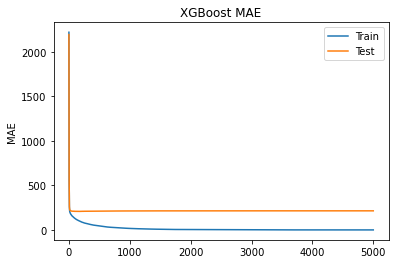

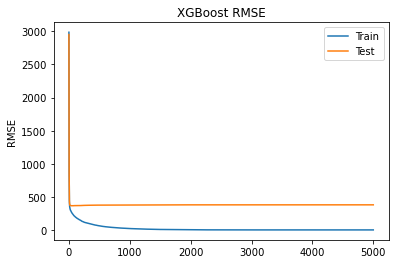

In [31]:
from matplotlib import pyplot
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
pyplot.ylabel('MAE')
pyplot.title('XGBoost MAE')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('RMSE')
pyplot.title('XGBoost RMSE')
pyplot.show()

In [32]:
eval_set=[(x_train,y_train),(x_test,y_test)]
model=XGBRegressor(n_estimators=5000,max_depth=8)
model.fit(x_train,y_train,eval_set=eval_set,eval_metric=["rmse","mae"],verbose=True,early_stopping_rounds=10)

[0]	validation_0-rmse:2985.48144	validation_0-mae:2220.84668	validation_1-rmse:2950.18970	validation_1-mae:2194.29761
[1]	validation_0-rmse:2135.24072	validation_0-mae:1557.49182	validation_1-rmse:2110.31104	validation_1-mae:1538.72620
[2]	validation_0-rmse:1545.70166	validation_0-mae:1093.75171	validation_1-rmse:1526.69617	validation_1-mae:1079.62537
[3]	validation_0-rmse:1137.46375	validation_0-mae:774.17285	validation_1-rmse:1126.76050	validation_1-mae:765.57257
[4]	validation_0-rmse:858.91699	validation_0-mae:559.69495	validation_1-rmse:856.14081	validation_1-mae:557.38049
[5]	validation_0-rmse:673.53241	validation_0-mae:422.65067	validation_1-rmse:679.57025	validation_1-mae:425.06918
[6]	validation_0-rmse:553.98846	validation_0-mae:338.91107	validation_1-rmse:564.88983	validation_1-mae:344.21765
[7]	validation_0-rmse:479.81424	validation_0-mae:287.75052	validation_1-rmse:494.56354	validation_1-mae:295.79242
[8]	validation_0-rmse:429.36874	validation_0-mae:256.11383	validation_1-rm

[72]	validation_0-rmse:232.66968	validation_0-mae:143.96233	validation_1-rmse:371.56473	validation_1-mae:210.02930
[73]	validation_0-rmse:231.16682	validation_0-mae:143.29764	validation_1-rmse:372.02200	validation_1-mae:210.33380
[74]	validation_0-rmse:229.69206	validation_0-mae:142.61542	validation_1-rmse:372.16330	validation_1-mae:210.41525
[75]	validation_0-rmse:228.22176	validation_0-mae:141.84421	validation_1-rmse:372.24493	validation_1-mae:210.47214
[76]	validation_0-rmse:227.36990	validation_0-mae:141.23524	validation_1-rmse:372.30997	validation_1-mae:210.38556
[77]	validation_0-rmse:226.36267	validation_0-mae:140.75549	validation_1-rmse:372.45462	validation_1-mae:210.33456


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
### early_stopping_rounds=n  : If there is not any improvement in metrics in last "n" iteration, stop!